In [1]:
from tensorflow.keras.models import Sequential, load_model
import os
import numpy as np
import nibabel as nib
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import measure
from skimage.transform import resize
from keras_unet.metrics import dice_coef
from keras_unet.models import custom_unet
from keras_unet.losses import jaccard_distance
from sklearn.model_selection import train_test_split
from PIL import Image
from PIL import ImageOps
import fnmatch
import nibabel as nib
import shutil
%matplotlib inline

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [183]:
model = custom_unet(input_shape=(512,512,1), num_classes=2)
model.load_weights('UNET_KU_EM_UB_train_MA_val.h5')
model_name = 'model1_UNET_KU_EM_UB_train_MA_val'

In [3]:
def gather_images(data_path):
    images = []
    path = data_path + '\\'
    for f in os.listdir(data_path):
      if '_K' in f:
        continue
      else:
        images.append(f)
        #segmentations.append(f.replace('.nii', '_K.nii'))

    #print(images[0], segmentations[0])
    images = np.array(images)
    #segmentations = np.array(segmentations)

    indices = np.array(range(len(images))) # we will use this in the next step.

    return images

In [185]:
data_path = r'C:\Users\emmasch\Documents\TIFF\NPY'
images = gather_images(data_path)

In [186]:
print(images[0])
print(len(images))
print(images[0:2])

113994_3_original_left.tif.npy
12
['113994_3_original_left.tif.npy' '113994_3_original_right.tif.npy']


In [187]:
d = {}
for i in images:
    if i not in d:
        d[i] = len(d)

labels_mapping = list(map(d.get, images))
#print(labels_mapping)

labels = {images[i]:labels_mapping[i] for i in range(len(images))}

In [188]:
img_stack = np.zeros((32,512,512,1))
label_list = []
for i in range(len(images)):
    image_slice = np.load(data_path + '\\' + images[i])
    img_stack[i,...,0] = image_slice
    label_list.append(images[i])

In [189]:
print(label_list[9])

157925_3_original_right.tif.npy


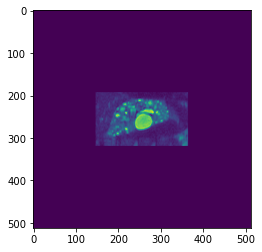

In [190]:
test = img_stack[10,:,:,0]
plt.imshow(test)

In [191]:
img_prediction = model.predict(img_stack)
img_prediction = img_prediction.astype('float')

In [192]:
npy_path = r'C:\Users\emmasch\Documents\TIFF\NPY'
for n in range(len(images)):
    prediction = img_prediction[n,:,:,0]
    name = str(label_list[n][:-8] + '_'+ model_name)
    np.save(os.path.join(npy_path, name), prediction)


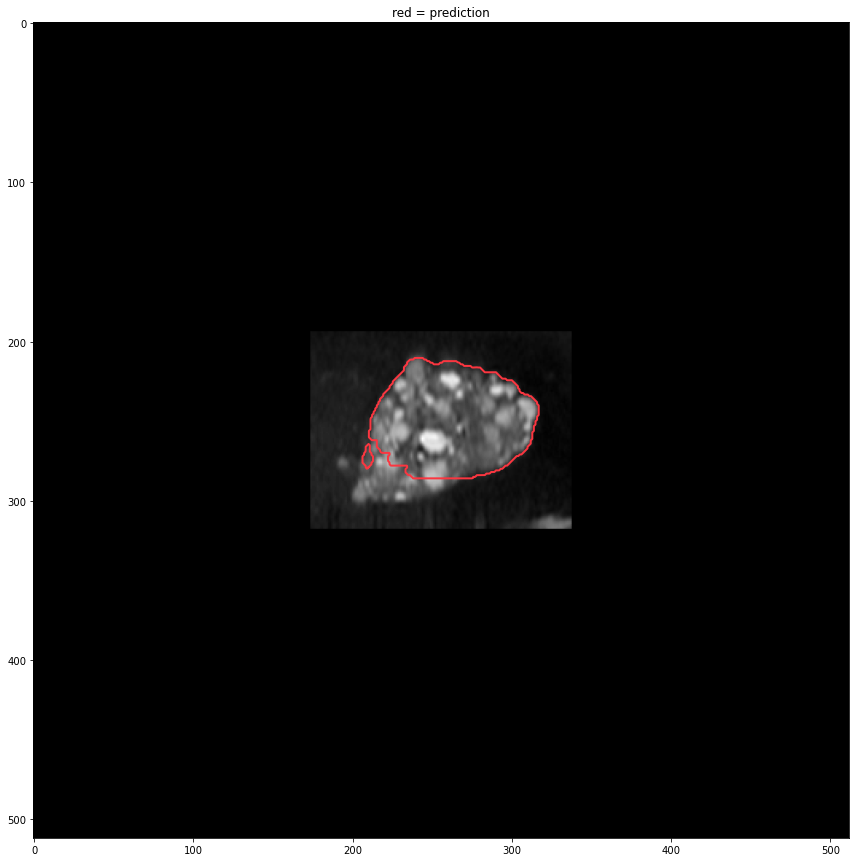

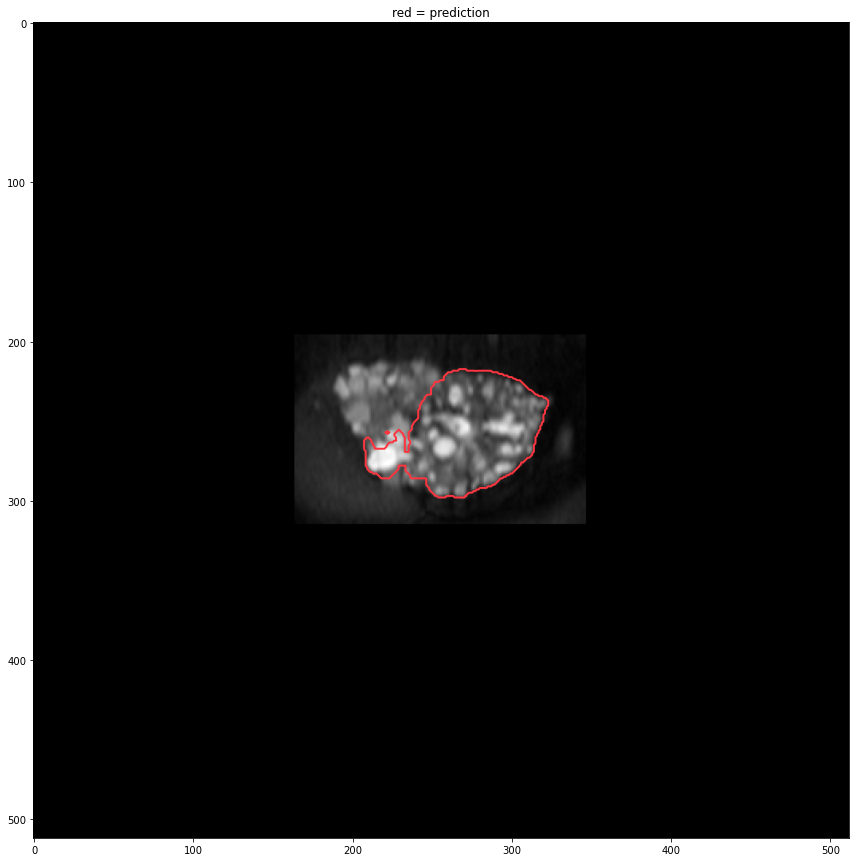

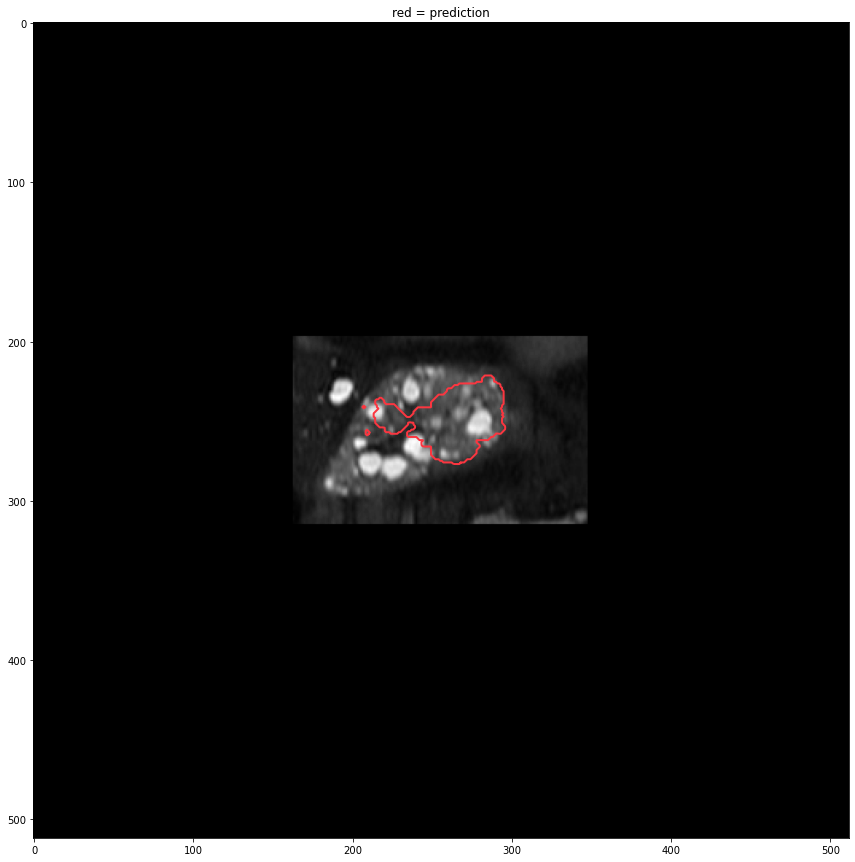

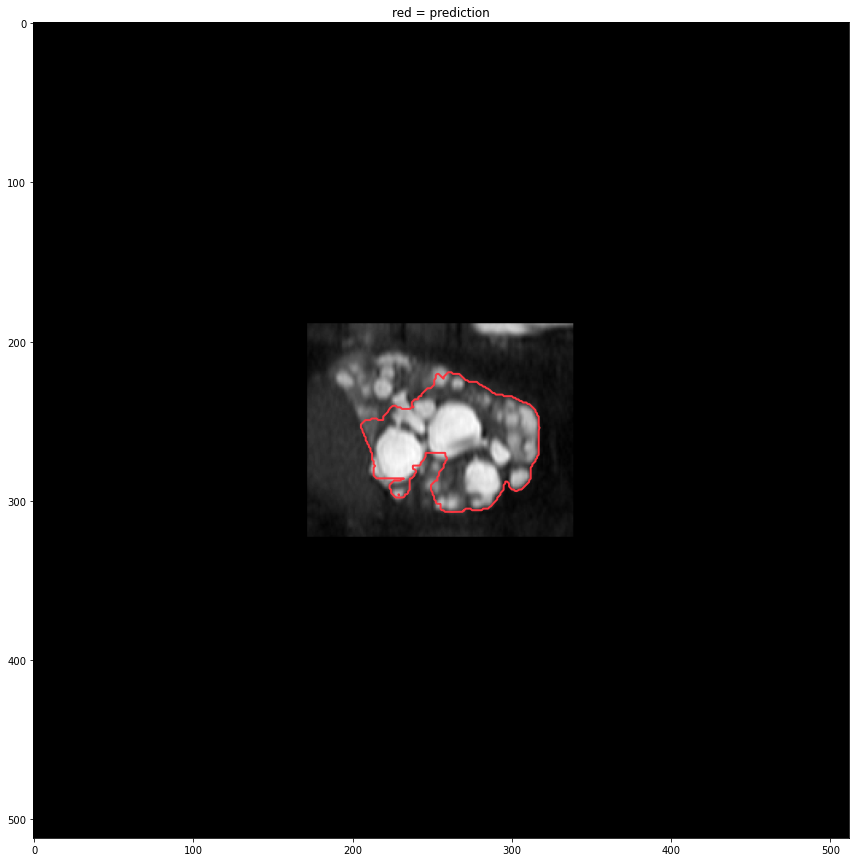

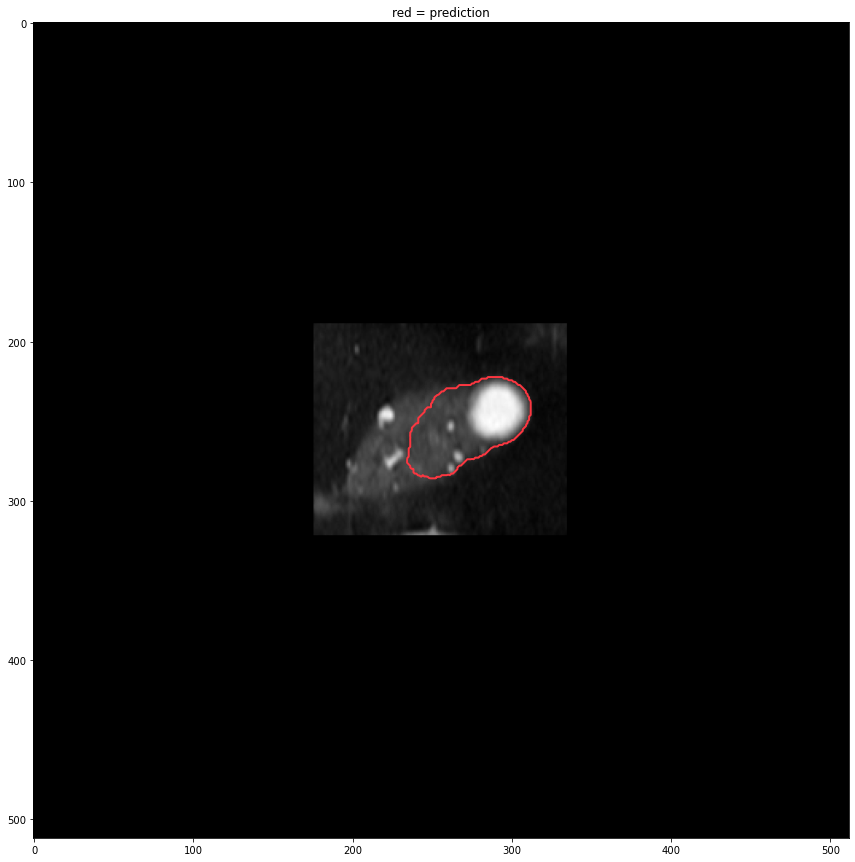

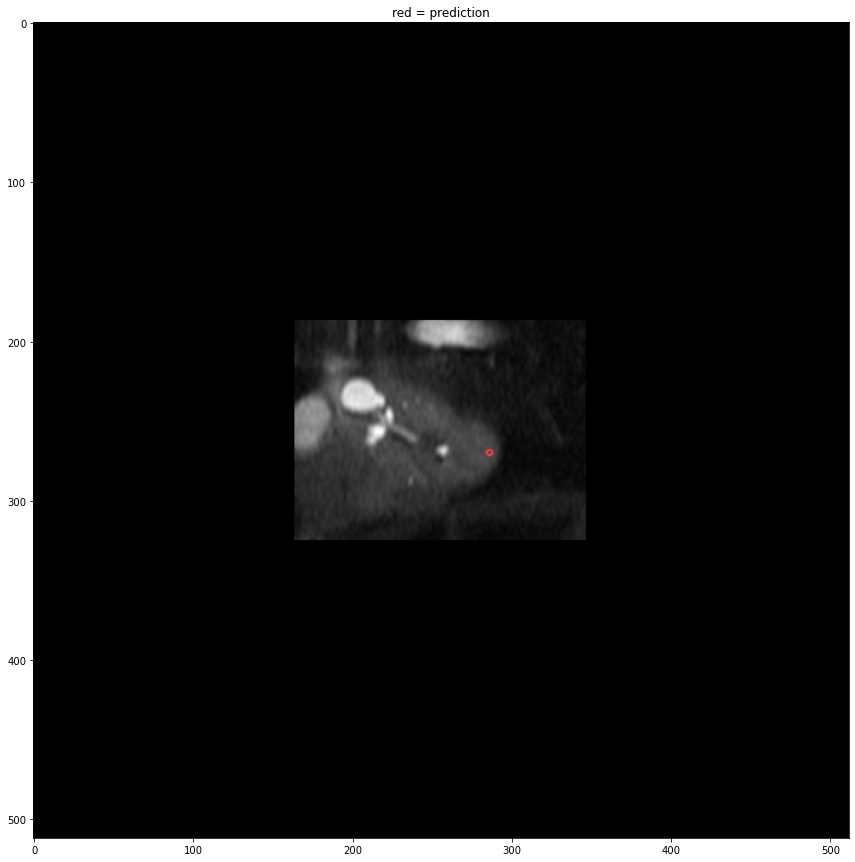

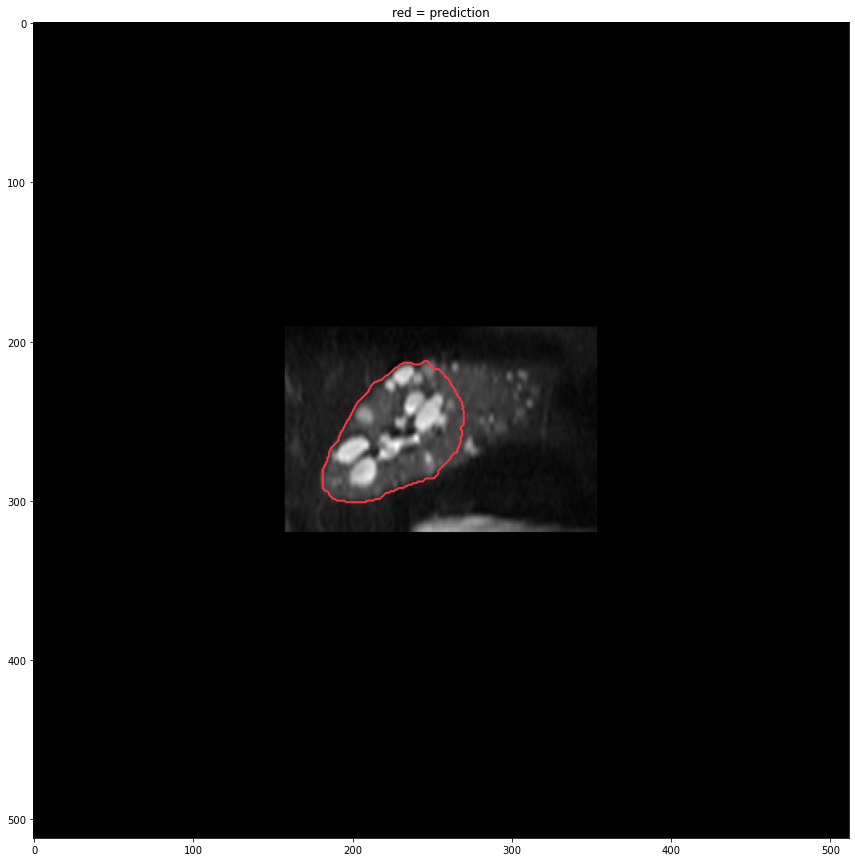

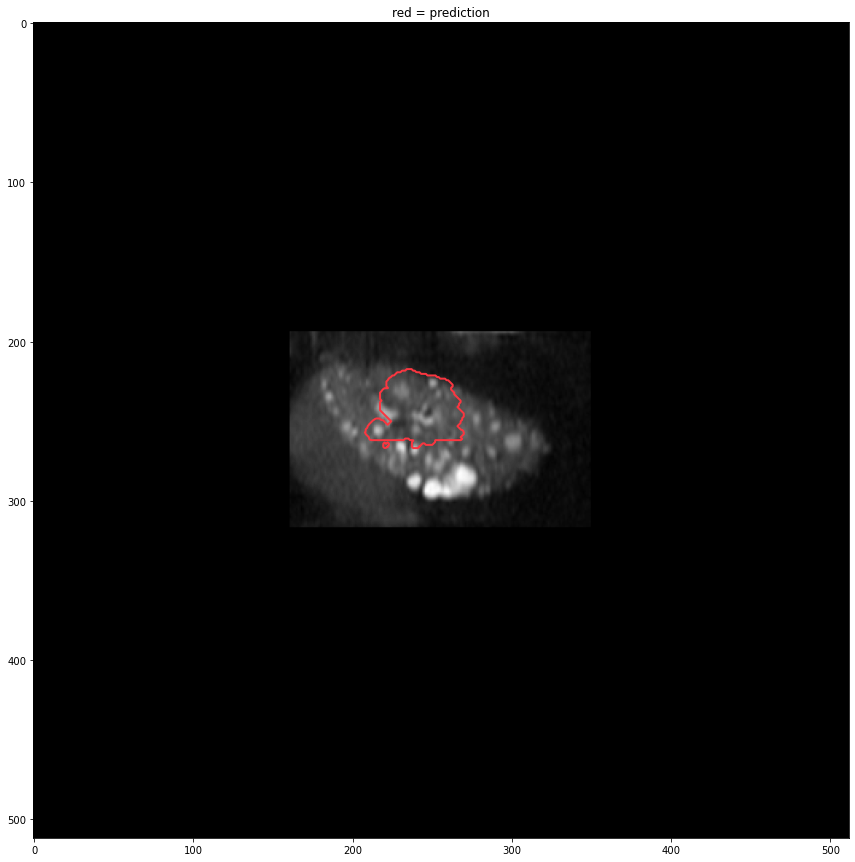

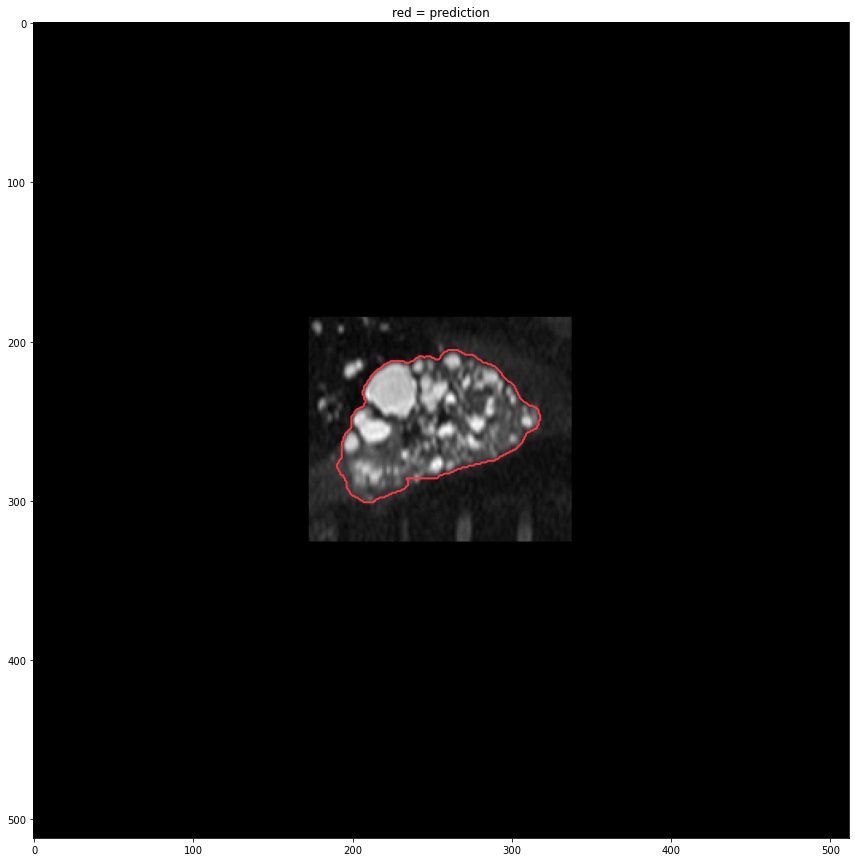

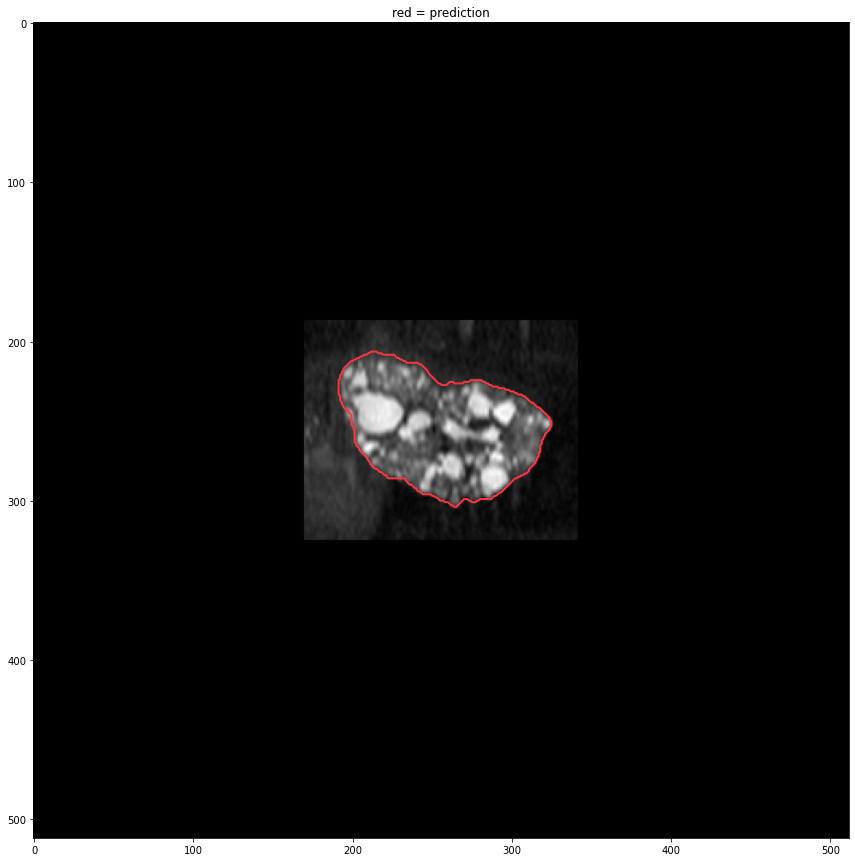

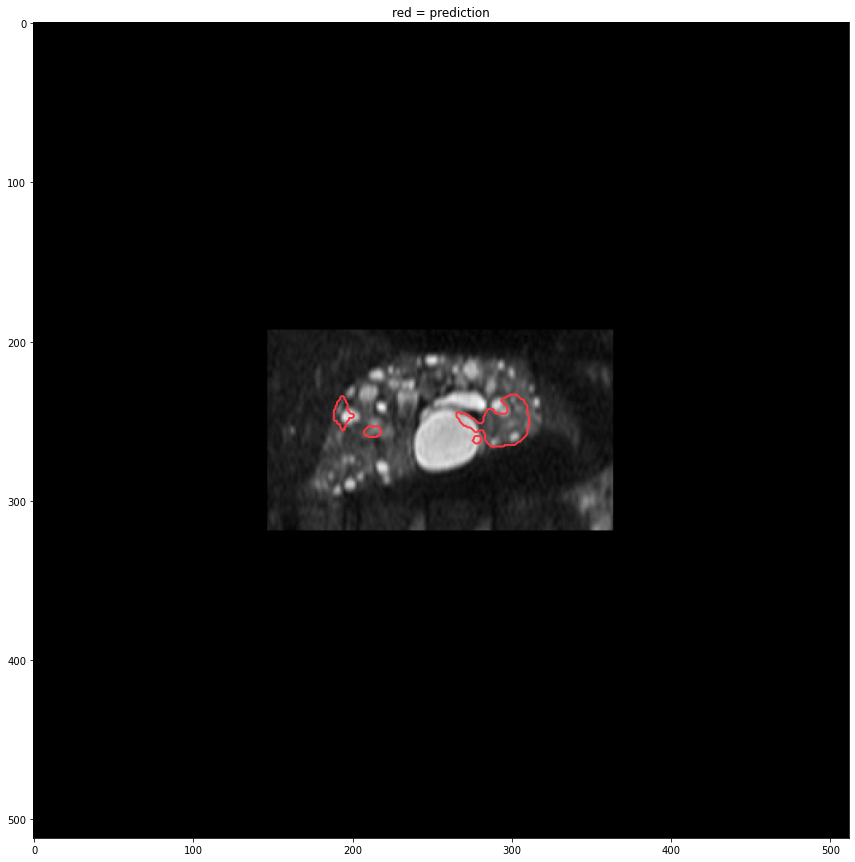

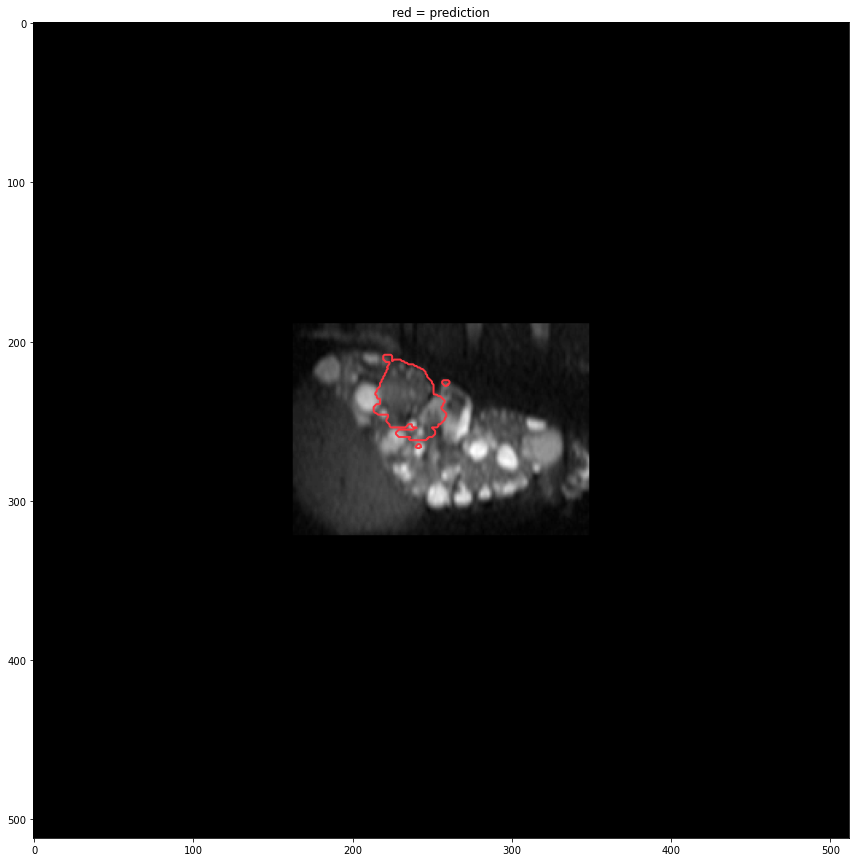

In [119]:
for n in range(len(images)):
    fig = plt.figure(figsize = (15,15))
    ax = fig.add_subplot()
    ax.imshow(img_stack[n,:,:,0], cmap=plt.cm.gray)

    prediction = img_prediction[n,:,:,0]
    contours = measure.find_contours(prediction, 0.8)
    for j,contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0],color='#FB3640', lw=2)
        #contours = measure.find_contours(segmentation, 0.8)
        #for contour in contours:
           # ax.plot(contour[:, 1], contour[:, 0],color='#35A7FF', lw=2)

    ax.axis('image')
    ax.title.set_text('red = prediction')
    pred = r'C:\Users\emmasch\Documents\TIFF\Predictions'
    name = str(label_list[n][:-8] + '_'+ model_name + '_PREDICTION.png')
    fig.savefig(os.path.join(pred,name))

In [3]:
filepath = 'D:\Kidney Unet\tensors\Emory\\'
m1 = 'UNET_KU_EM_UB'
m2 = 'UNET_KU_EM_UB'
m3 = 'UNET_MA_KU_EM'
m4 = 'UNET_MA_KU_UB'
inst = 'ALL_INST_80_20'
end = '_Prediction.npy'
pt = 'EM_200922_0_144_L_'


In [ ]:
model_1_f = str(filepath +pt + m1 + end)


In [62]:
model_1= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_Emory_cyst_35ep_Cpred.npy")
model_2= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_Mayo_cyst_35ep_Cpred.npy")
model_3= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_UAB_cyst_35ep_Cpred.npy")
model_4= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_Kansas_cyst_35ep_Cpred.npy")
inst = np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_All_inst_cyst_35ep_Cpred.npy")
truth = np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_C.npy")
name = 'predictions on UB_457036_2_105_L_.png'
original = np.load(r"C:\Users\UAB\data\UAB\data\UB_457036_2_105_L_30_M.npy")


In [ ]:
model_1= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_Emory-kidneys-35_Kpred.npy")
model_2= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_Mayo-kidneys-35_Kpred.npy")
model_3= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_UAB-kidneys-35_Kpred.npy")
model_4= np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_Kansas-kidneys-35_Kpred.npy")
inst = np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_ALL_INSTITUTION_80-10_35ep_Kpred.npy")
truth = np.load(r"D:\EKS-predicted\Tensors\UAB\Tensors\UB_457036_2_105_L_K.npy")
name = 'predictions on UB_457036_2_105_L_.png'
original = np.load(r"C:\Users\UAB\data\UAB\data\UB_457036_2_105_L_30_M.npy")

In [63]:
model_1 = model_1[:,:,30]
model_2 = model_2[:,:,30]
model_3 = model_3[:,:,30]
model_4 = model_4[:,:,30]
inst = inst[:,:,30]
truth = truth[:,:,30]


In [64]:
pred = r'C:\Users\UAB\data\UAB\\'
%matplotlib inline

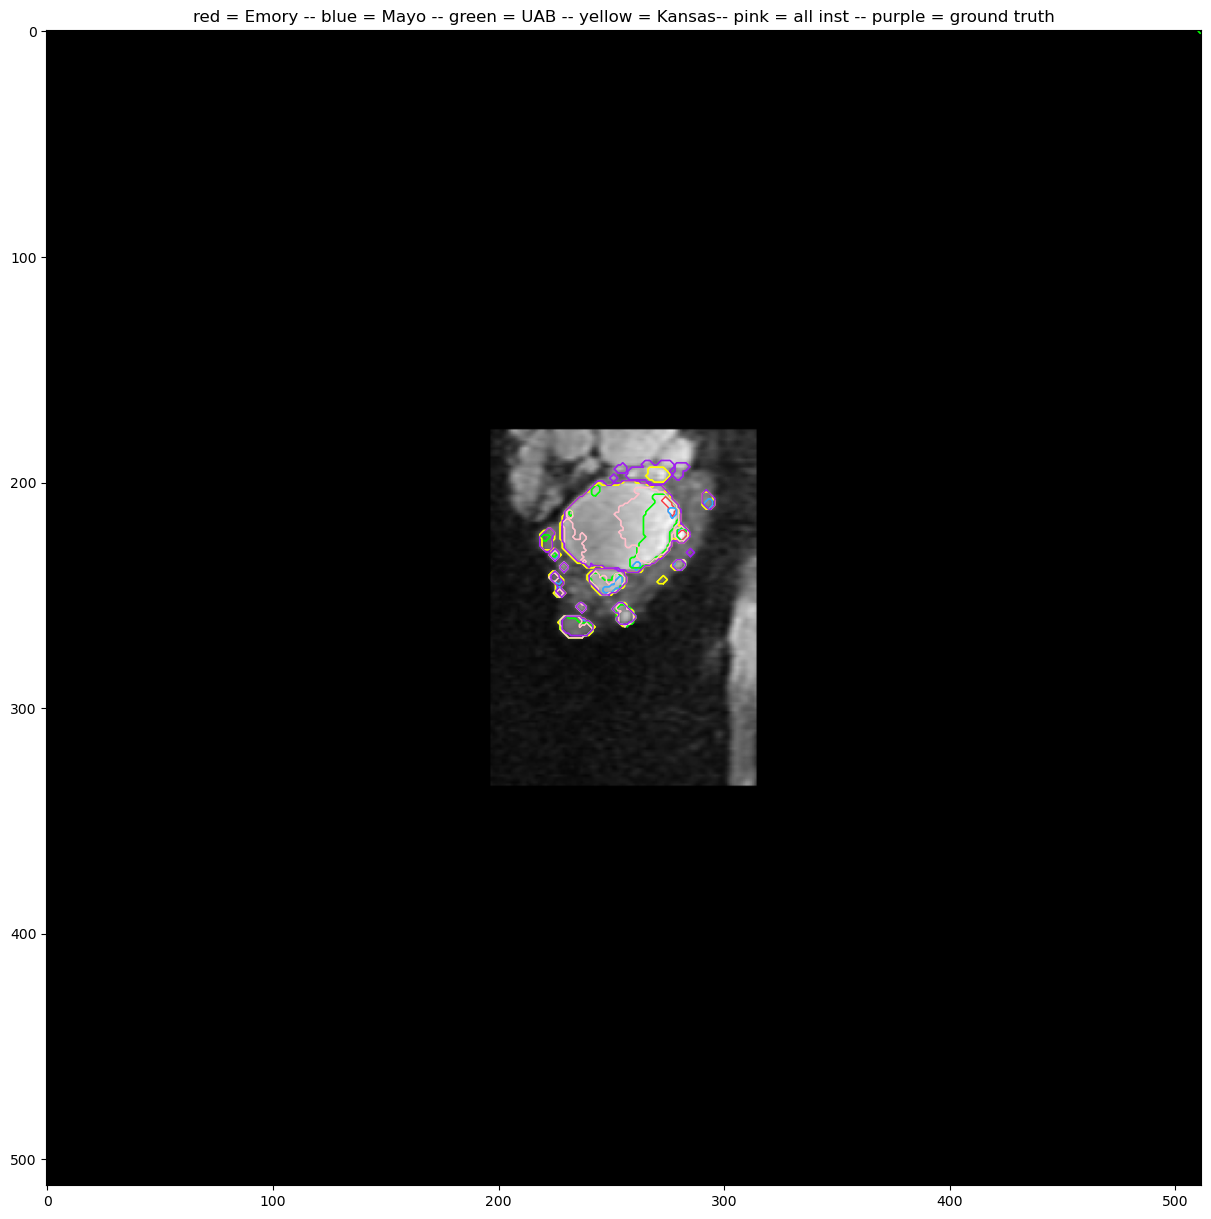

In [65]:


fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
ax.imshow(original, cmap=plt.cm.gray)

contours = measure.find_contours(model_1, 0.2)
for j,contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0],color='#FB3640', lw=1)
    contours = measure.find_contours(model_2, 0.2)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#35A7FF', lw=1)
        contours = measure.find_contours(model_3, 0.2)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#00FF00', lw=1)
        contours = measure.find_contours(model_4, 0.2)  
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#FFFF00', lw=1)
        contours = measure.find_contours(inst, 0.2)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#FFC0CB', lw=1)
        contours = measure.find_contours(truth, 0.2)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#A020F0', lw=1)
        
        

ax.axis('image')
ax.title.set_text('red = Emory -- blue = Mayo -- green = UAB -- yellow = Kansas-- pink = all inst -- purple = ground truth')
fig.savefig(os.path.join(pred,name))

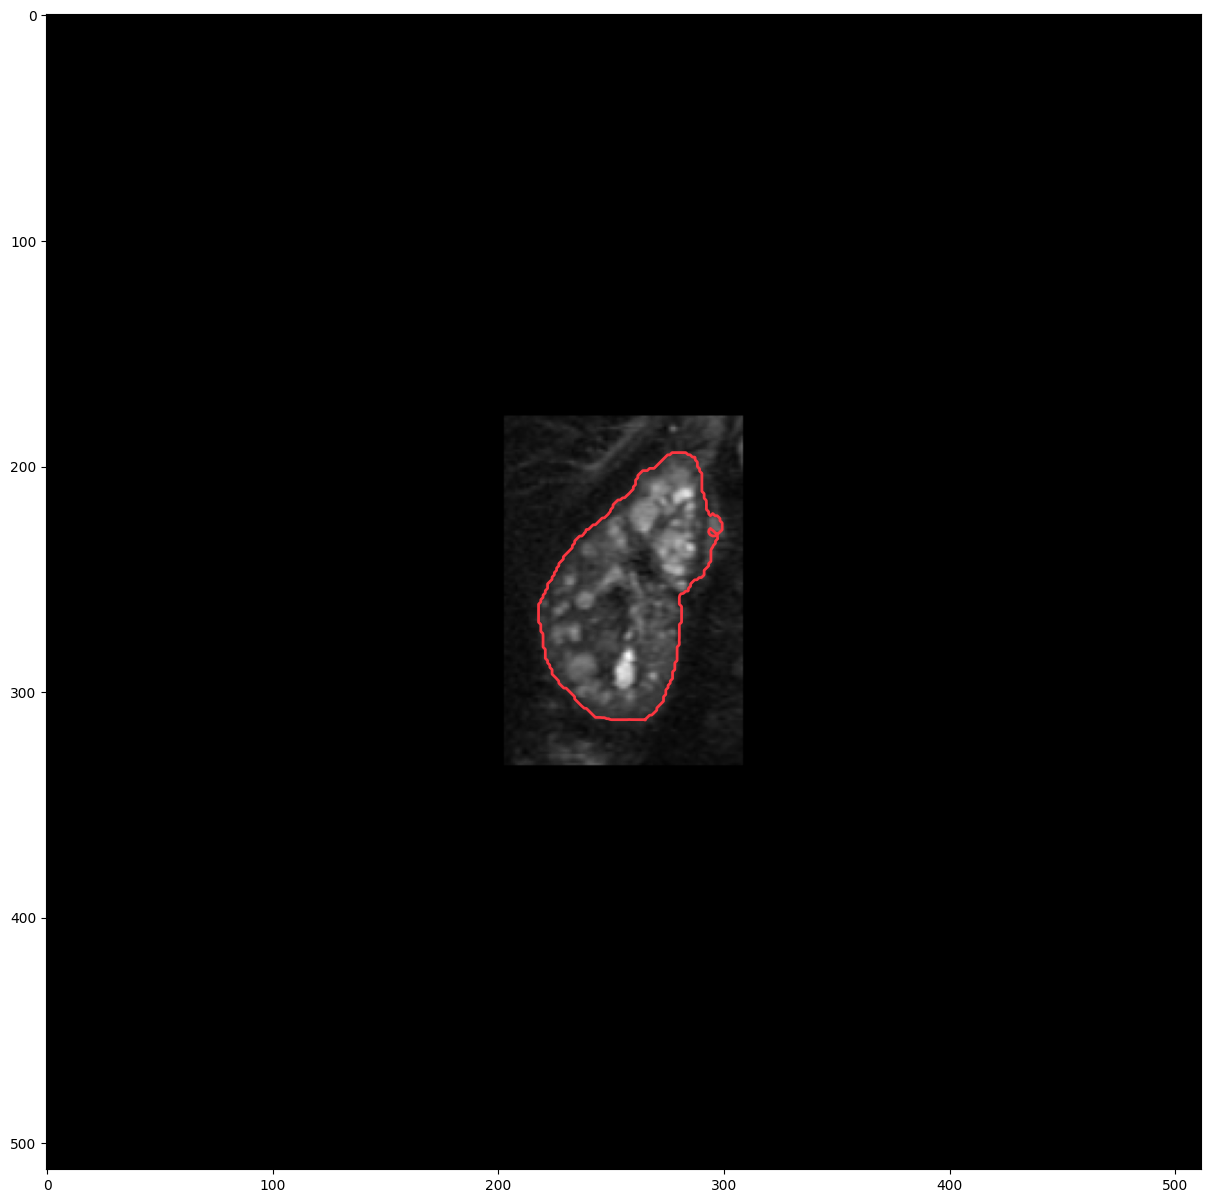

In [33]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
ax.imshow(original, cmap=plt.cm.gray)

contours = measure.find_contours(inst, 0.8)
for j,contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0],color='#FB3640', lw=2)

    
fig.savefig(os.path.join(pred,'All inst prediction on MA_300641_0_105_L.png'))

In [76]:
model_1= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_Emory_cyst_35ep_Cpred.npy")
model_2= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_Mayo_cyst_35ep_Cpred.npy")
model_3= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_UAB_cyst_35ep_Cpred.npy")
model_4= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_Kansas_cyst_35ep_Cpred.npy")
inst = np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_All_inst_cyst_35ep_Cpred.npy")
truth = np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_C.npy")
original = np.load(r"C:\Users\UAB\data\KU\data\KU_113994_0_87_L_30_M.npy")


In [83]:
model_1= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_Emory-kidneys-35_Kpred.npy")
model_2= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_Mayo-kidneys-35_Kpred.npy")
model_3= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_UAB-kidneys-35_Kpred.npy")
model_4= np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_Kansas-kidneys-35_Kpred.npy")
inst = np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_ALL_INSTITUTION_80-10_35ep_Kpred.npy")
truth = np.load(r"D:\EKS-predicted\Tensors\KU\Tensors\KU_113994_0_87_L_K.npy")
original = np.load(r"C:\Users\UAB\data\KU\data\KU_113994_0_87_L_30_M.npy")



In [84]:
model_1 = model_1[:,:,30]
model_2 = model_2[:,:,30]
model_3 = model_3[:,:,30]
model_4 = model_4[:,:,30]
inst = inst[:,:,30]
truth = truth[:,:,30]
pred = r'C:\Users\UAB\data\KU\\'
%matplotlib inline

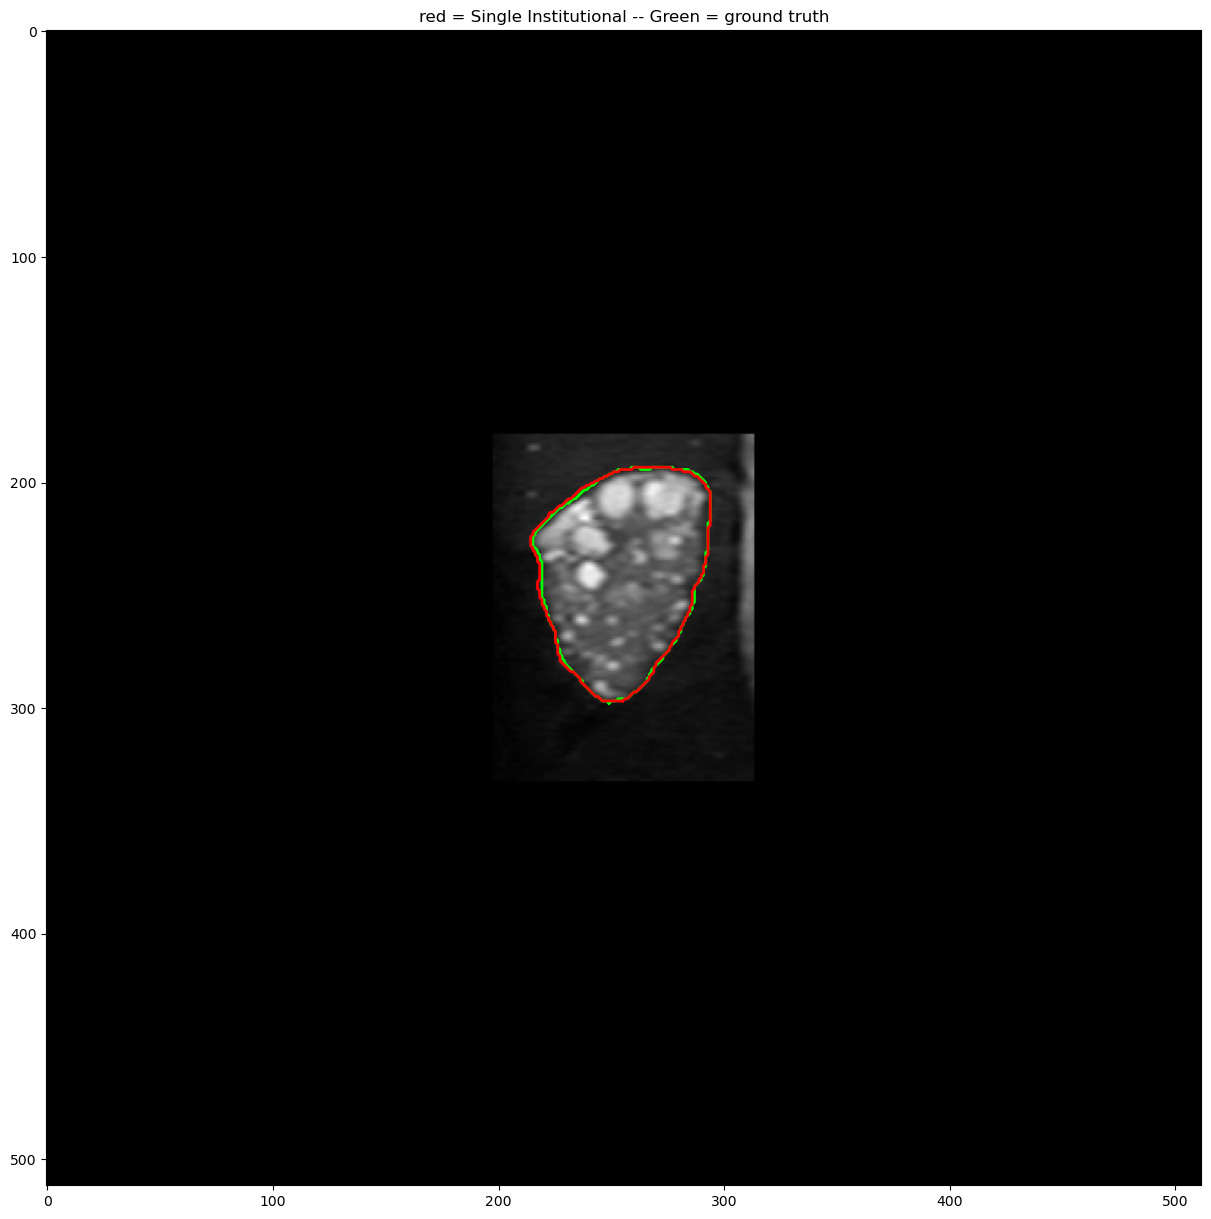

In [91]:
name = '2LW kidney KU predictions on KU_113994_0_87_L.png'

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot()
ax.imshow(original, cmap=plt.cm.gray)

contours = measure.find_contours(truth, 0.2)
for j,contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0],color='#00FF00', lw=2)
    contours = measure.find_contours(model_4, 0.2)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0],color='#FF0000', lw=2)
        

ax.axis('image')
ax.title.set_text('red = Single Institutional -- Green = ground truth')
fig.savefig(os.path.join(pred,name))